<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Motor Insurance Claim Decision using Machine Learning</h1>
</div>


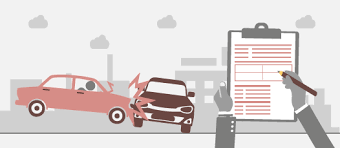

**Author:-** Aniket B. Barphe
    
**LinkedIn Profile:-** https://www.linkedin.com/in/aniiketbarphe/
        
**Platform:-** Analytics Olympiad 2022 (Machine Hack-30 Sep to 06 Nov 2022)
    
**Problem Statement:-** Build a machine learning-based approach to predict the Motor Insurance Claim Decision

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [2]:
# Data manipulation
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
import sklearn as sk
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))
print('scikit-learn version {}'.format(sk.__version__))

CatBoost version 1.1
NumPy version 1.21.5
Pandas version 1.4.2
seaborn version 0.11.2
sklearn version 1.0.2
xgboost version 1.6.2
lightgbm version 3.3.3
scikit-learn version 1.0.2


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [3]:
train = pd.read_csv(r'C:\Users\PC\Pictures\MH\Analytics-Olympiad2022\train.csv')
test = pd.read_csv(r'C:\Users\PC\Pictures\MH\Analytics-Olympiad2022\test.csv')
submission = pd.read_csv(r'C:\Users\PC\Pictures\MH\Analytics-Olympiad2022\submission.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 


In [4]:
print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  in

In [5]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')
print('-------------'*9)

About Train Data:-

       ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0  816393  40-64  female             20-29y   university   middle class   
1  251762  26-39    male             20-29y  high school   middle class   
2  481952  40-64    male             20-29y         none   middle class   
3    3506  40-64    male             20-29y  high school    upper class   
4  498013  40-64  female             20-29y         none  working class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0      0.638050                0.0   after 2015      0.0       0.0   
1      0.475741                1.0  before 2015      1.0       0.0   
2      0.839817                1.0  before 2015      1.0       1.0   
3      0.682527                1.0  before 2015      0.0       1.0   
4      0.572184                1.0   after 2015      1.0       1.0   

   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0        37379         11000.0 

In [6]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')
print('-------------'*9)

About Train Data:-

            ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION         INCOME  \
104995   19557    65+  female               0-9y  high school    upper class   
104996  222459  40-64  female               0-9y         none  working class   
104997   83089  16-25    male             10-19y         none    upper class   
104998  984879  40-64  female             20-29y  high school  working class   
104999  139618    65+  female             20-29y  high school    upper class   

        CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
104995      0.672255                1.0  before 2015      0.0       0.0   
104996      0.514193                1.0   after 2015      1.0       0.0   
104997      0.461942                1.0   after 2015      1.0       0.0   
104998      0.483571                1.0  before 2015      0.0       0.0   
104999      0.468710                1.0   after 2015      0.0       1.0   

        POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VI

In [7]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
count,105000.000000,105000,105000,105000,105000,105000,105000.000000,105000.000000,105000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000
unique,NaN,4,2,4,3,4,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,40-64,male,20-29y,high school,upper class,NaN,NaN,before 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Car
freq,NaN,33716,65317,37493,46590,51271,NaN,NaN,57511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34592
mean,394931.295905,NaN,NaN,NaN,NaN,NaN,0.602173,0.827038,NaN,0.584143,0.520000,18045.439267,11061.228571,0.675676,0.129733,0.549314,0.422648,NaN
std,279694.106053,NaN,NaN,NaN,NaN,NaN,0.138045,0.378216,NaN,0.492871,0.499602,16709.040449,2972.355482,1.383678,0.589714,1.402809,0.493983,NaN
min,101.000000,NaN,NaN,NaN,NaN,NaN,0.066880,0.000000,NaN,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,156351.750000,NaN,NaN,NaN,NaN,NaN,0.514876,1.000000,NaN,0.000000,0.000000,10238.000000,9000.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,354679.500000,NaN,NaN,NaN,NaN,NaN,0.601112,1.000000,NaN,1.000000,1.000000,10238.000000,11000.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,598602.250000,NaN,NaN,NaN,NaN,NaN,0.703216,1.000000,NaN,1.000000,1.000000,22957.750000,13000.000000,1.000000,0.000000,0.000000,1.000000,NaN


In [8]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
count,45000.000000,45000,45000,45000,45000,45000,45000.000000,45000.000000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000
unique,NaN,4,2,4,3,4,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,40-64,male,20-29y,high school,upper class,NaN,NaN,before 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Car
freq,NaN,14416,27958,16241,19977,21895,NaN,NaN,24640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14811
mean,395395.324133,NaN,NaN,NaN,NaN,NaN,0.601959,0.826800,NaN,0.582644,0.523956,17974.772733,11084.177778,0.688844,0.130244,0.548933,NaN
std,280943.713918,NaN,NaN,NaN,NaN,NaN,0.137370,0.378424,NaN,0.493128,0.499431,16630.476937,2966.584026,1.422621,0.592996,1.381562,NaN
min,101.000000,NaN,NaN,NaN,NaN,NaN,0.063765,0.000000,NaN,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,NaN
25%,153667.000000,NaN,NaN,NaN,NaN,NaN,0.514618,1.000000,NaN,0.000000,0.000000,10238.000000,9000.000000,0.000000,0.000000,0.000000,NaN
50%,353790.500000,NaN,NaN,NaN,NaN,NaN,0.599917,1.000000,NaN,1.000000,1.000000,10238.000000,11000.000000,0.000000,0.000000,0.000000,NaN
75%,599984.750000,NaN,NaN,NaN,NaN,NaN,0.702565,1.000000,NaN,1.000000,1.000000,21304.000000,13000.000000,1.000000,0.000000,1.000000,NaN


In [9]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
ID,0,0.0
AGE,0,0.0
GENDER,0,0.0
DRIVING_EXPERIENCE,0,0.0
EDUCATION,0,0.0
INCOME,0,0.0
CREDIT_SCORE,0,0.0
VEHICLE_OWNERSHIP,0,0.0
VEHICLE_YEAR,0,0.0
MARRIED,0,0.0


In [10]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
ID,0,0.0
AGE,0,0.0
GENDER,0,0.0
DRIVING_EXPERIENCE,0,0.0
EDUCATION,0,0.0
INCOME,0,0.0
CREDIT_SCORE,0,0.0
VEHICLE_OWNERSHIP,0,0.0
VEHICLE_YEAR,0,0.0
MARRIED,0,0.0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


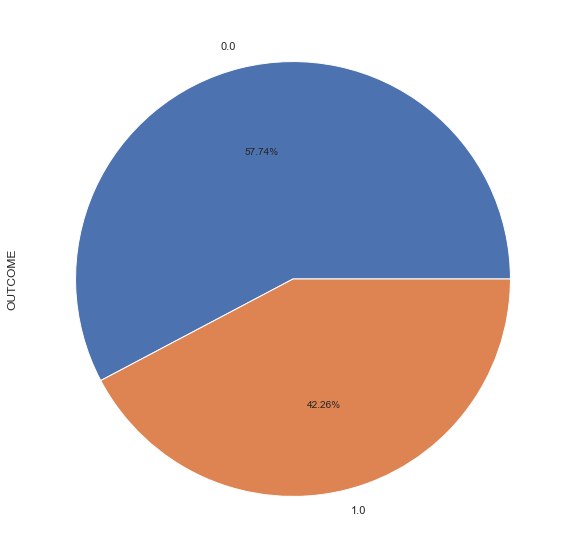

In [88]:
# Check the distribution of Target variable to see if it's a case of unbalanced class
plt.figure(figsize=(15,10))
train.OUTCOME.value_counts().plot.pie(autopct="%0.2f%%");

0.0    60622
1.0    44378
Name: OUTCOME, dtype: int64


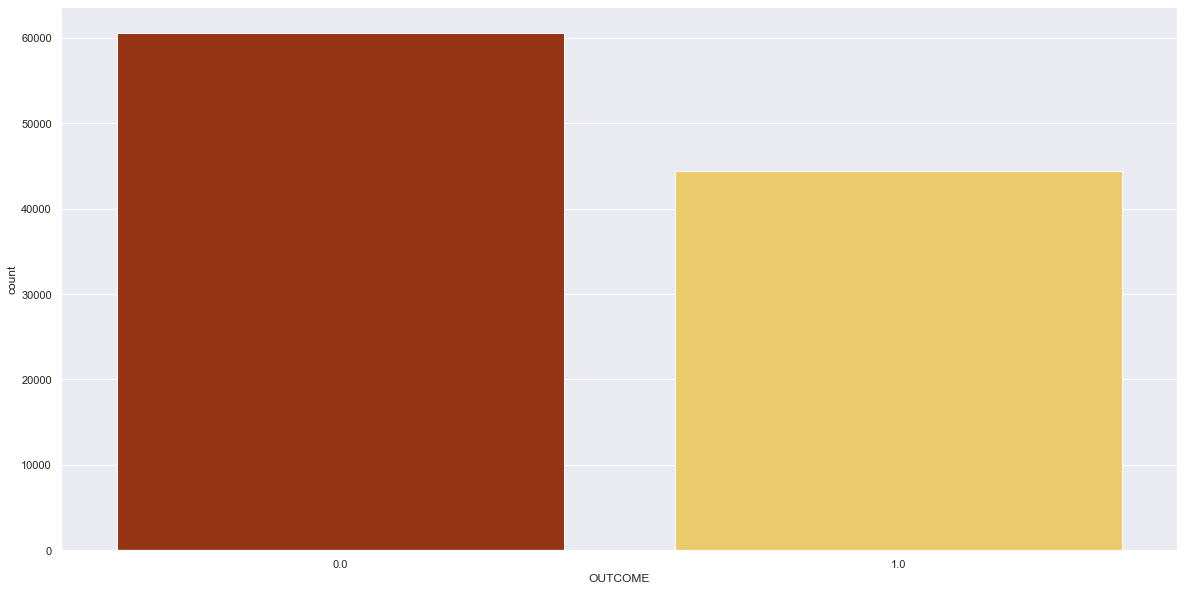

In [89]:
plt.figure(figsize=(20,10))
sns.countplot(x=train["OUTCOME"], palette = 'afmhot');
print(train["OUTCOME"].value_counts())

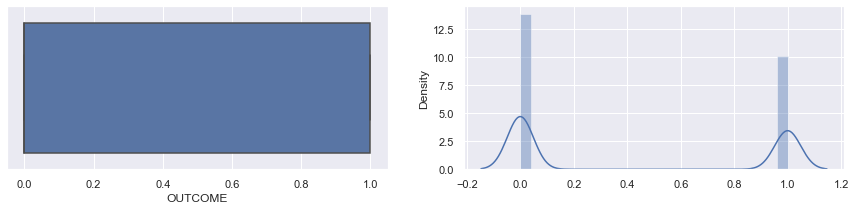

In [90]:
# Check distribution of Target Variable
# setup figure size
plt.subplots(figsize=(15,3))

# boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='OUTCOME', data=train);

# distplot
plt.subplot(1, 2, 2)
sns.distplot(x=train['OUTCOME']);

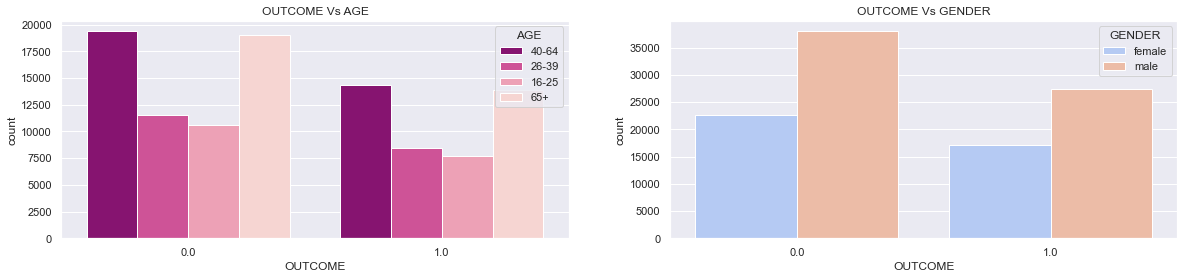

In [91]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('OUTCOME Vs AGE')
sns.countplot(x='OUTCOME',data=train,hue='AGE', palette = 'RdPu_r');
plt.subplot(122)
plt.title('OUTCOME Vs GENDER')
sns.countplot(x='OUTCOME',data=train,hue='GENDER', palette = 'coolwarm');

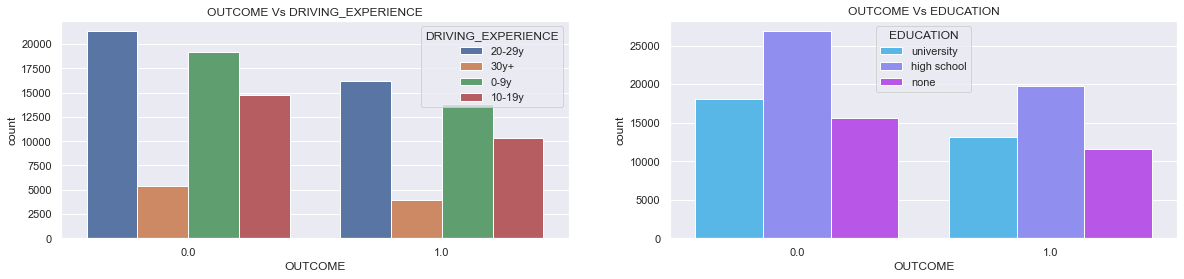

In [92]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('OUTCOME Vs DRIVING_EXPERIENCE')
sns.countplot(x='OUTCOME',data=train,hue='DRIVING_EXPERIENCE');
plt.subplot(122)
plt.title('OUTCOME Vs EDUCATION')
sns.countplot(x='OUTCOME',data=train,hue='EDUCATION',  palette = 'cool');

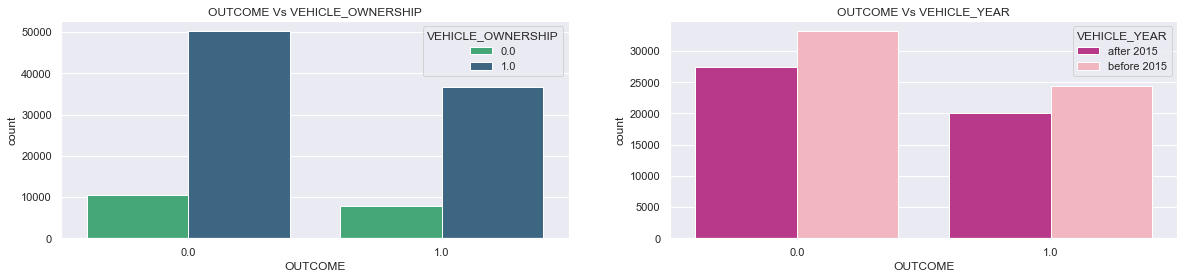

In [93]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('OUTCOME Vs VEHICLE_OWNERSHIP')
sns.countplot(x='OUTCOME',data=train,hue='VEHICLE_OWNERSHIP', palette = 'viridis_r');
plt.subplot(122)
plt.title('OUTCOME Vs VEHICLE_YEAR')
sns.countplot(x='OUTCOME',data=train,hue='VEHICLE_YEAR', palette = 'RdPu_r');

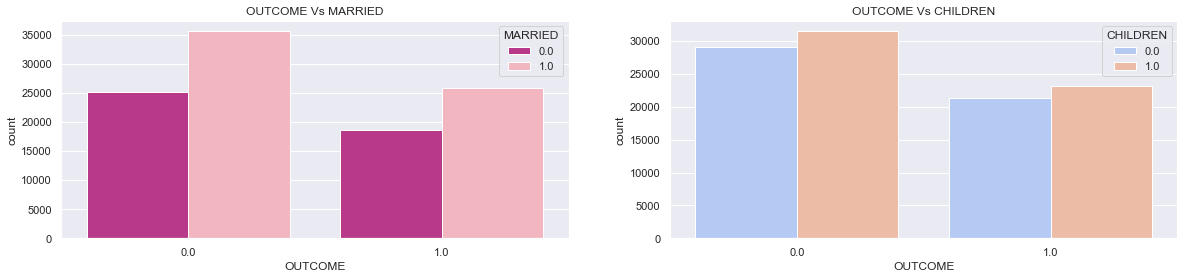

In [94]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('OUTCOME Vs MARRIED')
sns.countplot(x='OUTCOME',data=train,hue='MARRIED', palette = 'RdPu_r');
plt.subplot(122)
plt.title('OUTCOME Vs CHILDREN')
sns.countplot(x='OUTCOME',data=train,hue='CHILDREN', palette = 'coolwarm');

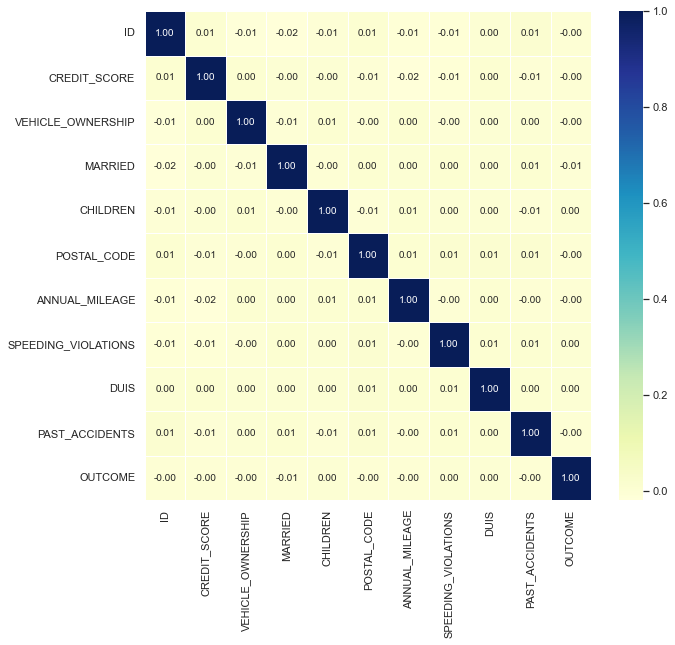

In [95]:
fig , ax = plt.subplots(figsize=(10,9))
sns.heatmap(train.corr(),annot = True,fmt='.2f',cmap='YlGnBu',linewidth=0.5);

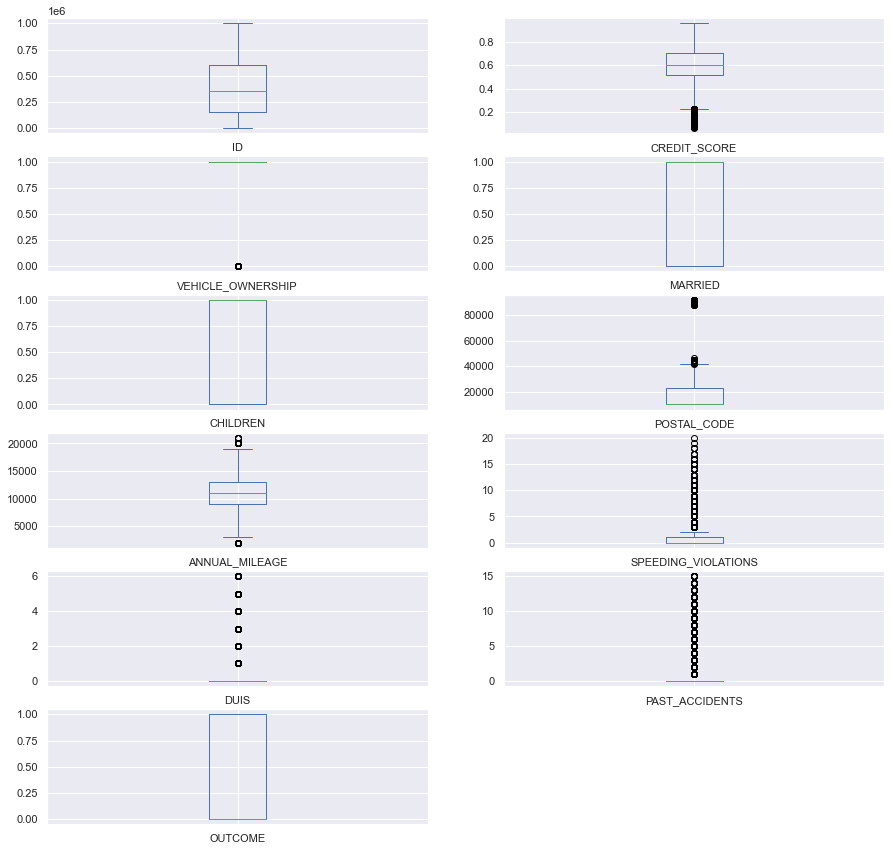

In [96]:
train.plot(kind="box",subplots=True,layout=(10,2),figsize=(15,25));

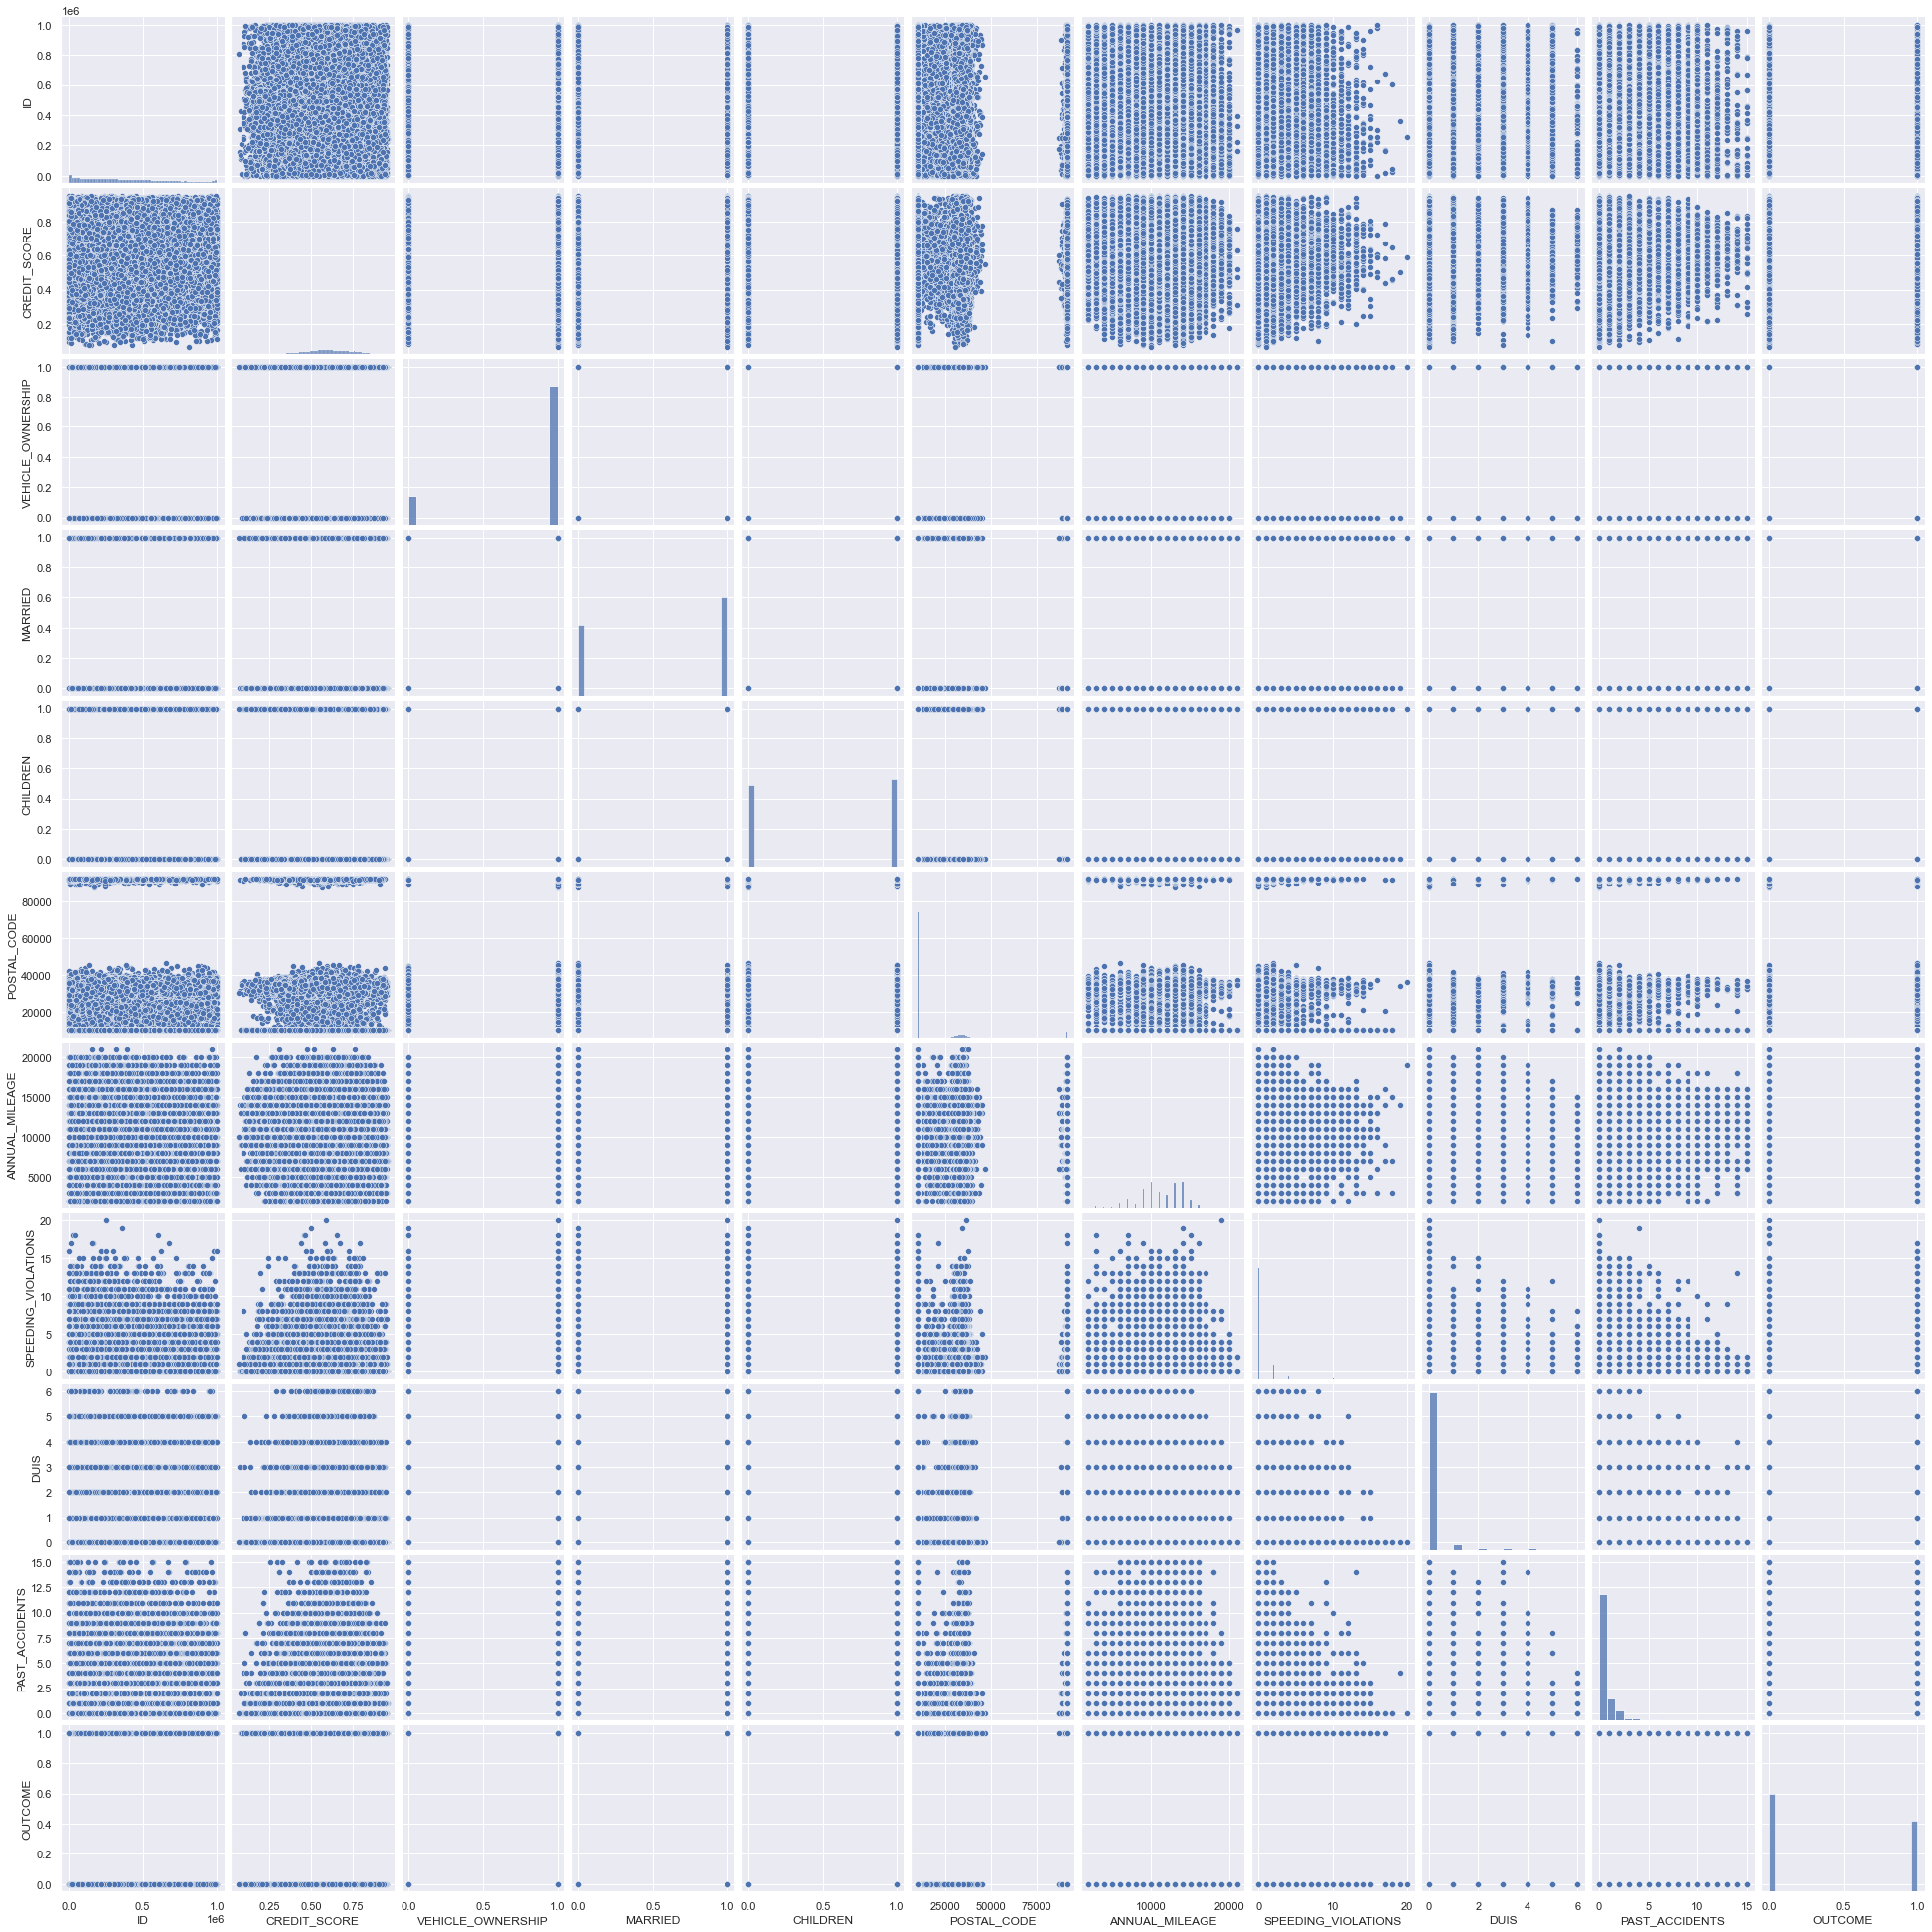

In [97]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Train DataSet</h2>
</div>

- Handling "AGE" Variable
- Handling "GENDER" Variable
- Handling "DRIVING_EXPERIENCE" Variable
- Handling "EDUCATION" Variable
- Handling "INCOME" Variable
- Handling "VEHICLE_YEAR" Variable
- Handling "TYPE_OF_VEHICLE" Variable

#### * Handling of "AGE" Variable

In [11]:
#train['AGE'].value_counts()
train['AGE']=train['AGE'].map({'16-25':0, '26-39':1, '40-64':2, '65+':3})
#print(train['AGE'])

#### * Handling of "GENDER" Variable

In [12]:
# train['GENDER'].value_counts()
train['GENDER']=train['GENDER'].map({'male':0, 'female':1})
# print(train['GENDER'])

#### * Handling of "DRIVING_EXPERIENCE" Variable

In [13]:
#train['DRIVING_EXPERIENCE'].value_counts()
train['DRIVING_EXPERIENCE']=train['DRIVING_EXPERIENCE'].map({'0-9y':0, '10-19y':1, '20-29y':2, '30y+':3})
# print(train['DRIVING_EXPERIENCE'])

#### * Handling of "EDUCATION" Variable

In [14]:
# train['EDUCATION'].value_counts()
train['EDUCATION']=train['EDUCATION'].map({'high school':0, 'university':1, 'none':2})
# print(train['EDUCATION'])

#### * Handling of "INCOME" Variable

In [15]:
# train['INCOME'].value_counts()
train['INCOME']=train['INCOME'].map({'upper class':0, 'working class':1, 'middle class':2, 'poverty':3})
# print(train['INCOME'])

#### * Handling of "VEHICLE_YEAR" Variable

In [16]:
# train['VEHICLE_YEAR'].value_counts()
train['VEHICLE_YEAR']=train['VEHICLE_YEAR'].map({'before 2015':0, 'after 2015':1})
# print(train['VEHICLE_YEAR'])

#### * Handling of "TYPE_OF_VEHICLE" Variable

In [17]:
# train['TYPE_OF_VEHICLE'].value_counts()
train['TYPE_OF_VEHICLE']=train['TYPE_OF_VEHICLE'].map({'Sports Car':0, 'Sedan':1, 'HatchBack':2, 'SUV':3})
# print(train['TYPE_OF_VEHICLE'])

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Test DataSet</h2>
</div>

- Handling "AGE" Variable
- Handling "GENDER" Variable
- Handling "DRIVING_EXPERIENCE" Variable
- Handling "EDUCATION" Variable
- Handling "INCOME" Variable
- Handling "VEHICLE_YEAR" Variable
- Handling "TYPE_OF_VEHICLE" Variable

#### * Handling of "AGE" Variable

In [18]:
# test['AGE'].value_counts()
test['AGE']=test['AGE'].map({'16-25':0, '26-39':1, '40-64':2, '65+':3})
# print(test['AGE'])

#### * Handling of "GENDER" Variable

In [19]:
# test['GENDER'].value_counts()
test['GENDER']=test['GENDER'].map({'male':0, 'female':1})
# print(test['GENDER'])

#### * Handling of "DRIVING_EXPERIENCE" Variable

In [20]:
# test['DRIVING_EXPERIENCE'].value_counts()
test['DRIVING_EXPERIENCE']=test['DRIVING_EXPERIENCE'].map({'0-9y':0, '10-19y':1, '20-29y':2, '30y+':3})
# print(test['DRIVING_EXPERIENCE'])

#### * Handling of "EDUCATION" Variable

In [21]:
# test['EDUCATION'].value_counts()
test['EDUCATION']=test['EDUCATION'].map({'high school':0, 'university':1, 'none':2})
# print(test['EDUCATION'])

#### * Handling of "INCOME" Variable

In [22]:
# test['INCOME'].value_counts()
test['INCOME']=test['INCOME'].map({'upper class':0, 'working class':1, 'middle class':2, 'poverty':3})
# print(test['INCOME'])

#### * Handling of "VEHICLE_YEAR" Variable

In [23]:
#test['VEHICLE_YEAR'].value_counts()
test['VEHICLE_YEAR']=test['VEHICLE_YEAR'].map({'before 2015':0, 'after 2015':1})
# print(test['VEHICLE_YEAR'])

#### * Handling of "TYPE_OF_VEHICLE" Variable

In [24]:
# test['TYPE_OF_VEHICLE'].value_counts()
test['TYPE_OF_VEHICLE']=test['TYPE_OF_VEHICLE'].map({'Sports Car':0, 'Sedan':1, 'HatchBack':2, 'SUV':3})
# print(test['TYPE_OF_VEHICLE'])

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [112]:
train.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [113]:
test.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
TYPE_OF_VEHICLE        0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>


In [25]:
train = train.drop(['ID'],axis=1)
print(train.head())
print('-------------'*9)
test = test.drop(['ID'],axis=1)
print(test.head())
print('-------------'*9)

   AGE  GENDER  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0    2       1                   2          1       2      0.638050   
1    1       0                   2          0       2      0.475741   
2    2       0                   2          2       2      0.839817   
3    2       0                   2          0       0      0.682527   
4    2       1                   2          2       1      0.572184   

   VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  POSTAL_CODE  \
0                0.0             1      0.0       0.0        37379   
1                1.0             0      1.0       0.0        10238   
2                1.0             0      1.0       1.0        10238   
3                1.0             0      0.0       1.0        92099   
4                1.0             1      1.0       1.0        32122   

   ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  OUTCOME  \
0         11000.0                    0     0               0      0.0   
1     

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AGE                  105000 non-null  int64  
 1   GENDER               105000 non-null  int64  
 2   DRIVING_EXPERIENCE   105000 non-null  int64  
 3   EDUCATION            105000 non-null  int64  
 4   INCOME               105000 non-null  int64  
 5   CREDIT_SCORE         105000 non-null  float64
 6   VEHICLE_OWNERSHIP    105000 non-null  float64
 7   VEHICLE_YEAR         105000 non-null  int64  
 8   MARRIED              105000 non-null  float64
 9   CHILDREN             105000 non-null  float64
 10  POSTAL_CODE          105000 non-null  int64  
 11  ANNUAL_MILEAGE       105000 non-null  float64
 12  SPEEDING_VIOLATIONS  105000 non-null  int64  
 13  DUIS                 105000 non-null  int64  
 14  PAST_ACCIDENTS       105000 non-null  int64  
 15  OUTCOME          

In [116]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  45000 non-null  int64  
 1   GENDER               45000 non-null  int64  
 2   DRIVING_EXPERIENCE   45000 non-null  int64  
 3   EDUCATION            45000 non-null  int64  
 4   INCOME               45000 non-null  int64  
 5   CREDIT_SCORE         45000 non-null  float64
 6   VEHICLE_OWNERSHIP    45000 non-null  float64
 7   VEHICLE_YEAR         45000 non-null  int64  
 8   MARRIED              45000 non-null  float64
 9   CHILDREN             45000 non-null  float64
 10  POSTAL_CODE          45000 non-null  int64  
 11  ANNUAL_MILEAGE       45000 non-null  float64
 12  SPEEDING_VIOLATIONS  45000 non-null  int64  
 13  DUIS                 45000 non-null  int64  
 14  PAST_ACCIDENTS       45000 non-null  int64  
 15  TYPE_OF_VEHICLE      45000 non-null 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing and Model Building</h2>
</div>

In [27]:
train_temp,test_temp=train_test_split(train,test_size=0.000001,random_state=0)

print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

features=list(train.columns)
label='OUTCOME'

features.remove(label)

print('-------------'*9)
print("\nFEATURES ARE:-",features)

print('-------------'*9)

print("\nLABELS ARE:-",label)

print('-------------'*9)

X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]

Length of Original Data:- 105000 
Length of Train Data:- 104999 
Length of Test Data:- 1
---------------------------------------------------------------------------------------------------------------------

FEATURES ARE:- ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'TYPE_OF_VEHICLE']
---------------------------------------------------------------------------------------------------------------------

LABELS ARE:- OUTCOME
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1-  Logistic Regression</h2>
</div>

In [51]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_train,y_train) 
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model1.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model1.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of Logistic Regression on training set: 0.58
Accuracy of Logistic Regression on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

Log Loss Metric is :

 14.597870635466494 



#### * Hyper Parameter Tuning for Logistic Regression

In [119]:
solvers = ['newton-cg', 'sag', 'lbfgs']
penalty = ['l2','l1']
C = [0.01, 0.1, 1.0, 10, 100]
param = dict(solver=solvers, penalty=penalty, C=C)
random_search = RandomizedSearchCV(estimator=model1, param_distributions=param, cv=5, scoring='accuracy')
random_result = random_search.fit(X_train, y_train)
print('-------------'*9)
print("Best Parameters after Random Search:- \n",random_result.best_params_)
print('-------------'*9)

---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Fitting Logistic Regression Model with best Hyperparameters generated by Random Search</h2>
</div>

In [52]:
model2 = LogisticRegression(solver = 'newton-cg',penalty = 'l2',C = 0.01,random_state=42)
model2.fit(X_train,y_train) 
print('Accuracy of Logistic Regression(Best Hyperparameters) on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

print('Accuracy of Logistic Regression(Best Hyperparameters) on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model2.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model2.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of Logistic Regression(Best Hyperparameters) on training set: 0.58
Accuracy of Logistic Regression(Best Hyperparameters) on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

Log Loss Metric is :

 14.597870635466494 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Random Forest Classifier</h2>
</div>

In [53]:
model3 = RandomForestClassifier(random_state=466)
model3.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model3.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model3.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model3.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 9.99200722162641e-16 



#### * Hyper Parameter Tuning for Random Forest Classifier

In [121]:
n_estimators = [10, 50, 100, 200]
max_depth = [4, 6, 8, 10]
max_features =  ['sqrt', 'auto', 'log2']
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [3, 5, 10] 
bootstrap = [True, False]
grid = dict(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features
            , min_samples_split = min_samples_split, min_samples_leaf=min_samples_leaf
            , bootstrap=bootstrap)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
random_search = RandomizedSearchCV(estimator=model3, param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy')
random_result = random_search.fit(X_train,y_train)
print('-------------'*9)
print("Best Parameters after Random Search:- \n",random_result.best_params_)

---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 4, 'bootstrap': False}


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Fitting Random Forest Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

In [54]:
model4 = RandomForestClassifier(n_estimators = 50, min_samples_split = 5, min_samples_leaf = 10
                                , max_features = 'auto', max_depth = 4, bootstrap = False,random_state=42)
model4.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier(Best Hyperparameters) on training set: {:.2f}'
     .format(model4.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier(Best Hyperparameters) on test set: {:.2f}'
     .format(model4.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model4.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model4.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of Random Forest Classifier(Best Hyperparameters) on training set: 0.58
Accuracy of Random Forest Classifier(Best Hyperparameters) on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.591291796335542 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- LGBM Classifier</h2>
</div>

In [55]:
model5 = LGBMClassifier(random_state=0)
model5.fit(X_train,y_train) 
print('Accuracy of LGBM Classifier on training set: {:.2f}'
     .format(model5.score(X_train, y_train)))

print('Accuracy of LGBM Classifier on test set: {:.2f}'
     .format(model5.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model5.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model5.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of LGBM Classifier on training set: 0.59
Accuracy of LGBM Classifier on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.229454943526733 



#### * Hyper Parameter Tuning for LGBM Classifier

In [123]:
boosting_type = ['gbdt','dart','goss']
num_leaves = [10, 20, 30, 40, 50]
max_depth = [-1, 5, 10, 15, 20]
learning_rate = [0.03, 0.07, 0.3]
n_estimators = [100, 200, 300, 400, 500]
min_child_samples = [20, 40]
colsample_bytree = [0.5, 1]
reg_alpha = [2]
reg_lambda = [2]
param = dict(boosting_type=boosting_type, num_leaves=num_leaves, max_depth=max_depth, learning_rate=learning_rate,
            n_estimators=n_estimators, min_child_samples=min_child_samples, colsample_bytree=colsample_bytree,
            reg_alpha=reg_alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
lgbm_search = RandomizedSearchCV(estimator=model5, param_distributions=param, n_jobs=-1, cv=cv, scoring='accuracy')
lgbm_result = lgbm_search.fit(X_train,y_train)
print('-------------'*9)
print("Best Parameters after Random Search:- \n",lgbm_result.best_params_)
print('-------------'*9)

---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 {'reg_alpha': 2, 'num_leaves': 10, 'n_estimators': 400, 'min_child_samples': 40, 'max_depth': 15, 'learning_rate': 0.07, 'colsample_bytree': 1, 'boosting_type': 'dart'}
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Fitting LGBM Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

In [56]:
model6 = LGBMClassifier(reg_alpha = 2, num_leaves = 10, n_estimators = 400, min_child_samples = 40
                        , max_depth = 15, learning_rate = 0.07, colsample_bytree = 1
                        , boosting_type = 'dart',random_state=42)
model6.fit(X_train,y_train) 
print('Accuracy of LGBM Classifier(Best Hyperparameters) on training set: {:.2f}'
     .format(model6.score(X_train, y_train)))

print('Accuracy of LGBM Classifier(Best Hyperparameters) on test set: {:.2f}'
     .format(model6.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model6.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model6.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of LGBM Classifier(Best Hyperparameters) on training set: 0.58
Accuracy of LGBM Classifier(Best Hyperparameters) on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.584384226572224 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- CatBoost Classifier</h2>
</div>

In [57]:
model7 = CatBoostClassifier(random_state=0)
model7.fit(X_train,y_train) 
print('Accuracy of CatBoost Classifier on training set: {:.2f}'
     .format(model7.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier on test set: {:.2f}'
     .format(model7.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model7.predict(X_test)),'\n')
print('-------------'*9)
Log_Loss = log_loss(y_train, model7.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Learning rate set to 0.075159
0:	learn: 0.6913671	total: 80.9ms	remaining: 1m 20s
1:	learn: 0.6898326	total: 120ms	remaining: 59.7s
2:	learn: 0.6884738	total: 159ms	remaining: 53s
3:	learn: 0.6873353	total: 196ms	remaining: 48.7s
4:	learn: 0.6863484	total: 227ms	remaining: 45.1s
5:	learn: 0.6855218	total: 258ms	remaining: 42.7s
6:	learn: 0.6847974	total: 296ms	remaining: 42s
7:	learn: 0.6841799	total: 327ms	remaining: 40.6s
8:	learn: 0.6836365	total: 370ms	remaining: 40.7s
9:	learn: 0.6831640	total: 412ms	remaining: 40.8s
10:	learn: 0.6827782	total: 448ms	remaining: 40.2s
11:	learn: 0.6824394	total: 480ms	remaining: 39.5s
12:	learn: 0.6821215	total: 517ms	remaining: 39.3s
13:	learn: 0.6818469	total: 546ms	remaining: 38.5s
14:	learn: 0.6816090	total: 584ms	remaining: 38.4s
15:	learn: 0.6814166	total: 625ms	remaining: 38.5s
16:	learn: 0.6812357	total: 658ms	remaining: 38s
17:	learn: 0.6810684	total: 688ms	remaining: 37.5s
18:	learn: 0.6809220	total: 720ms	remaining: 37.2s
19:	learn: 0.68

163:	learn: 0.6747669	total: 5.97s	remaining: 30.4s
164:	learn: 0.6747407	total: 6s	remaining: 30.4s
165:	learn: 0.6746990	total: 6.04s	remaining: 30.3s
166:	learn: 0.6746746	total: 6.07s	remaining: 30.3s
167:	learn: 0.6746361	total: 6.11s	remaining: 30.3s
168:	learn: 0.6746020	total: 6.14s	remaining: 30.2s
169:	learn: 0.6745448	total: 6.19s	remaining: 30.2s
170:	learn: 0.6745120	total: 6.22s	remaining: 30.2s
171:	learn: 0.6744913	total: 6.25s	remaining: 30.1s
172:	learn: 0.6744473	total: 6.29s	remaining: 30.1s
173:	learn: 0.6744240	total: 6.33s	remaining: 30s
174:	learn: 0.6744038	total: 6.36s	remaining: 30s
175:	learn: 0.6743474	total: 6.4s	remaining: 30s
176:	learn: 0.6743097	total: 6.44s	remaining: 29.9s
177:	learn: 0.6742936	total: 6.47s	remaining: 29.9s
178:	learn: 0.6742569	total: 6.5s	remaining: 29.8s
179:	learn: 0.6742169	total: 6.53s	remaining: 29.8s
180:	learn: 0.6741756	total: 6.57s	remaining: 29.7s
181:	learn: 0.6741347	total: 6.6s	remaining: 29.7s
182:	learn: 0.6740963	to

324:	learn: 0.6688601	total: 11.9s	remaining: 24.7s
325:	learn: 0.6688267	total: 12s	remaining: 24.7s
326:	learn: 0.6688045	total: 12s	remaining: 24.7s
327:	learn: 0.6687660	total: 12s	remaining: 24.6s
328:	learn: 0.6687438	total: 12.1s	remaining: 24.6s
329:	learn: 0.6687075	total: 12.1s	remaining: 24.5s
330:	learn: 0.6686707	total: 12.1s	remaining: 24.5s
331:	learn: 0.6686405	total: 12.2s	remaining: 24.5s
332:	learn: 0.6685916	total: 12.2s	remaining: 24.4s
333:	learn: 0.6685682	total: 12.2s	remaining: 24.4s
334:	learn: 0.6685358	total: 12.3s	remaining: 24.4s
335:	learn: 0.6685065	total: 12.3s	remaining: 24.3s
336:	learn: 0.6684657	total: 12.4s	remaining: 24.3s
337:	learn: 0.6684254	total: 12.4s	remaining: 24.3s
338:	learn: 0.6683890	total: 12.4s	remaining: 24.3s
339:	learn: 0.6683476	total: 12.5s	remaining: 24.2s
340:	learn: 0.6683123	total: 12.5s	remaining: 24.2s
341:	learn: 0.6682877	total: 12.6s	remaining: 24.2s
342:	learn: 0.6682607	total: 12.6s	remaining: 24.2s
343:	learn: 0.6682

488:	learn: 0.6636736	total: 18.7s	remaining: 19.5s
489:	learn: 0.6636364	total: 18.7s	remaining: 19.5s
490:	learn: 0.6635994	total: 18.7s	remaining: 19.4s
491:	learn: 0.6635699	total: 18.8s	remaining: 19.4s
492:	learn: 0.6635359	total: 18.8s	remaining: 19.3s
493:	learn: 0.6634965	total: 18.8s	remaining: 19.3s
494:	learn: 0.6634830	total: 18.9s	remaining: 19.3s
495:	learn: 0.6634613	total: 18.9s	remaining: 19.2s
496:	learn: 0.6634352	total: 18.9s	remaining: 19.2s
497:	learn: 0.6634018	total: 19s	remaining: 19.1s
498:	learn: 0.6633834	total: 19s	remaining: 19.1s
499:	learn: 0.6633672	total: 19s	remaining: 19s
500:	learn: 0.6633455	total: 19.1s	remaining: 19s
501:	learn: 0.6633131	total: 19.1s	remaining: 18.9s
502:	learn: 0.6632950	total: 19.1s	remaining: 18.9s
503:	learn: 0.6632729	total: 19.2s	remaining: 18.9s
504:	learn: 0.6632431	total: 19.2s	remaining: 18.8s
505:	learn: 0.6632106	total: 19.2s	remaining: 18.8s
506:	learn: 0.6631913	total: 19.3s	remaining: 18.7s
507:	learn: 0.6631453	

650:	learn: 0.6591680	total: 24.4s	remaining: 13.1s
651:	learn: 0.6591349	total: 24.4s	remaining: 13s
652:	learn: 0.6591048	total: 24.5s	remaining: 13s
653:	learn: 0.6590667	total: 24.5s	remaining: 13s
654:	learn: 0.6590428	total: 24.5s	remaining: 12.9s
655:	learn: 0.6590192	total: 24.6s	remaining: 12.9s
656:	learn: 0.6589834	total: 24.6s	remaining: 12.8s
657:	learn: 0.6589496	total: 24.7s	remaining: 12.8s
658:	learn: 0.6589165	total: 24.7s	remaining: 12.8s
659:	learn: 0.6588941	total: 24.7s	remaining: 12.7s
660:	learn: 0.6588658	total: 24.8s	remaining: 12.7s
661:	learn: 0.6588388	total: 24.8s	remaining: 12.7s
662:	learn: 0.6588136	total: 24.8s	remaining: 12.6s
663:	learn: 0.6587704	total: 24.9s	remaining: 12.6s
664:	learn: 0.6587398	total: 24.9s	remaining: 12.6s
665:	learn: 0.6587122	total: 25s	remaining: 12.5s
666:	learn: 0.6586736	total: 25s	remaining: 12.5s
667:	learn: 0.6586507	total: 25.1s	remaining: 12.5s
668:	learn: 0.6586163	total: 25.1s	remaining: 12.4s
669:	learn: 0.6585983	

812:	learn: 0.6547564	total: 31.5s	remaining: 7.25s
813:	learn: 0.6547414	total: 31.6s	remaining: 7.21s
814:	learn: 0.6547182	total: 31.6s	remaining: 7.17s
815:	learn: 0.6547117	total: 31.6s	remaining: 7.13s
816:	learn: 0.6546802	total: 31.7s	remaining: 7.1s
817:	learn: 0.6546587	total: 31.7s	remaining: 7.06s
818:	learn: 0.6546344	total: 31.8s	remaining: 7.02s
819:	learn: 0.6546197	total: 31.8s	remaining: 6.98s
820:	learn: 0.6545914	total: 31.8s	remaining: 6.94s
821:	learn: 0.6545731	total: 31.9s	remaining: 6.9s
822:	learn: 0.6545535	total: 31.9s	remaining: 6.86s
823:	learn: 0.6545283	total: 31.9s	remaining: 6.82s
824:	learn: 0.6545117	total: 32s	remaining: 6.78s
825:	learn: 0.6544775	total: 32s	remaining: 6.74s
826:	learn: 0.6544576	total: 32.1s	remaining: 6.71s
827:	learn: 0.6544348	total: 32.1s	remaining: 6.67s
828:	learn: 0.6544010	total: 32.1s	remaining: 6.63s
829:	learn: 0.6543740	total: 32.2s	remaining: 6.59s
830:	learn: 0.6543572	total: 32.2s	remaining: 6.55s
831:	learn: 0.6543

977:	learn: 0.6506089	total: 38.1s	remaining: 856ms
978:	learn: 0.6505908	total: 38.1s	remaining: 817ms
979:	learn: 0.6505807	total: 38.1s	remaining: 778ms
980:	learn: 0.6505566	total: 38.1s	remaining: 739ms
981:	learn: 0.6505252	total: 38.2s	remaining: 700ms
982:	learn: 0.6504957	total: 38.2s	remaining: 661ms
983:	learn: 0.6504776	total: 38.2s	remaining: 622ms
984:	learn: 0.6504515	total: 38.3s	remaining: 583ms
985:	learn: 0.6504182	total: 38.3s	remaining: 544ms
986:	learn: 0.6504063	total: 38.3s	remaining: 505ms
987:	learn: 0.6503748	total: 38.4s	remaining: 466ms
988:	learn: 0.6503407	total: 38.4s	remaining: 427ms
989:	learn: 0.6503164	total: 38.4s	remaining: 388ms
990:	learn: 0.6503012	total: 38.5s	remaining: 349ms
991:	learn: 0.6502757	total: 38.5s	remaining: 311ms
992:	learn: 0.6502608	total: 38.5s	remaining: 272ms
993:	learn: 0.6502352	total: 38.6s	remaining: 233ms
994:	learn: 0.6502163	total: 38.6s	remaining: 194ms
995:	learn: 0.6501844	total: 38.6s	remaining: 155ms
996:	learn: 

#### * Hyper Parameter Tuning for CatBoost Classifier

In [125]:
parameters = {'depth': [4,5,6,7,8,9, 10]
              ,'learning_rate' : [0.01,0.02,0.03,0.04]
              ,'iterations' : [10, 20,30,40,50,60,70,80,90, 100]
             }
Grid_m7 = GridSearchCV(estimator=model7, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_m7.fit(X_train, y_train)
print('-------------'*9)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_m7.best_estimator_)
print('-------------'*9)
print("\n The best parameters across ALL searched params:\n",Grid_m7.best_params_)

0:	learn: 0.6928961	total: 41.9ms	remaining: 377ms
1:	learn: 0.6926527	total: 73.8ms	remaining: 295ms
2:	learn: 0.6924222	total: 90.5ms	remaining: 211ms
3:	learn: 0.6921955	total: 106ms	remaining: 159ms
4:	learn: 0.6919703	total: 128ms	remaining: 128ms
5:	learn: 0.6917540	total: 147ms	remaining: 98.2ms
6:	learn: 0.6915366	total: 177ms	remaining: 76ms
7:	learn: 0.6913119	total: 208ms	remaining: 52.1ms
8:	learn: 0.6910972	total: 240ms	remaining: 26.7ms
9:	learn: 0.6908887	total: 280ms	remaining: 0us
---------------------------------------------------------------------------------------------------------------------
 Results from Grid Search 

 The best estimator across ALL searched params:
---------------------------------------------------------------------------------------------------------------------

 The best parameters across ALL searched params:
 {'depth': 9, 'iterations': 10, 'learning_rate': 0.01}


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- Fitting CatBoost Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [58]:
model8 = CatBoostClassifier(depth = 9, iterations = 10, learning_rate = 0.01,random_state=0)
model8.fit(X_train,y_train) 
print('Accuracy of CatBoost Classifier(Best Hyperparameters) on training set: {:.2f}'
     .format(model8.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier(Best Hyperparameters) on test set: {:.2f}'
     .format(model8.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model8.predict(X_test)),'\n')
print('-------------'*9)
Log_Loss = log_loss(y_train, model8.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

0:	learn: 0.6928961	total: 252ms	remaining: 2.27s
1:	learn: 0.6926527	total: 292ms	remaining: 1.17s
2:	learn: 0.6924222	total: 327ms	remaining: 763ms
3:	learn: 0.6921955	total: 358ms	remaining: 536ms
4:	learn: 0.6919703	total: 396ms	remaining: 396ms
5:	learn: 0.6917540	total: 428ms	remaining: 285ms
6:	learn: 0.6915366	total: 482ms	remaining: 207ms
7:	learn: 0.6913119	total: 537ms	remaining: 134ms
8:	learn: 0.6910972	total: 586ms	remaining: 65.1ms
9:	learn: 0.6908887	total: 637ms	remaining: 0us
Accuracy of CatBoost Classifier(Best Hyperparameters) on training set: 0.58
Accuracy of CatBoost Classifier(Best Hyperparameters) on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00  

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- KNeighbors Classifier</h2>
</div>

In [59]:
model9 = KNeighborsClassifier(n_jobs= -1)
model9.fit(X_train,y_train) 
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'
     .format(model9.score(X_train, y_train)))

print('Accuracy of KNeighbors Classifier on test set: {:.2f}'
     .format(model9.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model9.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model9.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of KNeighbors Classifier on training set: 0.70
Accuracy of KNeighbors Classifier on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 10.47893035769773 



#### * Hyper Parameter Tuning for KNeighbors Classifier

In [ ]:
model9 = KNeighborsClassifier(n_jobs= -1)
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

model = GridSearchCV(model9, param_grid=params, n_jobs=1)
model.fit(X_train,y_train)
print('-------------'*9)
print(" Results from Grid Search " )
print("Best Hyper Parameters:\n",model.best_params_)
print('-------------'*9)
print("\n The best parameters across ALL searched params:\n",model.best_params_)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Fitting KNeighbors Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [60]:
model10 = KNeighborsClassifier(algorithm = 'auto', n_jobs= -1, leaf_size = 1, n_neighbors = 8, weights = 'uniform')
model10.fit(X_train,y_train) 
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'
     .format(model10.score(X_train, y_train)))

print('Accuracy of KNeighbors Classifier on test set: {:.2f}'
     .format(model10.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model10.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model10.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of KNeighbors Classifier on training set: 0.65
Accuracy of KNeighbors Classifier on test set: 0.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       1.0
         1.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 12.129531590227964 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 11- XGB Classifier</h2>
</div>

In [61]:
model11 = XGBClassifier(random_state=0)
model11.fit(X_train,y_train) 
print('Accuracy of XGB Classifier on training set: {:.2f}'
     .format(model11.score(X_train, y_train)))

print('Accuracy of XGB Classifier on test set: {:.2f}'
     .format(model11.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model11.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model11.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of XGB Classifier on training set: 0.62
Accuracy of XGB Classifier on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 13.076185749892028 



#### * Hyper Parameter Tuning for Hyper Parameter Tuning for XGB Classifier

In [41]:
params = {'max_depth': [3, 6, 10, 15],'min_child_weight' : [ 1, 3, 5, 7 ],'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]
              }

xgbclf = xgb.XGBClassifier(objective="multi:softmax", tree_method='hist')
clf_search = RandomizedSearchCV(estimator=xgbclf,param_distributions=params,scoring='accuracy'
                         ,n_iter=25,n_jobs=4,verbose=1)
clf_result = clf_search.fit(X_train,y_train)
print('-------------'*9)
print("Best Parameters after Random Search:- \n",clf_result.best_params_)
print('-------------'*9)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 {'subsample': 0.8999999999999999, 'num_class': 10, 'n_estimators': 750, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.7999999999999999}
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 12- Fitting XGB Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

In [98]:
model12 = XGBClassifier(n_estimators = 750
                        , min_child_weight = 1, max_depth = 3, learning_rate = 0.01
                        , gamma = 0.1, colsample_bytree = 0.8999999999999999
                        , colsample_bylevel = 0.7999999999999999,random_state=0)
model12.fit(X_train,y_train) 
print('Accuracy of XGB Classifier on training set: {:.2f}'
     .format(model12.score(X_train, y_train)))

print('Accuracy of XGB Classifier on test set: {:.2f}'
     .format(model12.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model12.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model12.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of XGB Classifier on training set: 0.58
Accuracy of XGB Classifier on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.57221325804685 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 13- Linear Support Vector Classification</h2>
</div>

In [62]:
mm = make_pipeline(StandardScaler(),LinearSVC())
model13 = CalibratedClassifierCV(mm)
model13.fit(X_train,y_train) 
print('Accuracy of Linear SVC on training set: {:.2f}'
     .format(model13.score(X_train, y_train)))

print('Accuracy of Linear SVC on test set: {:.2f}'
     .format(model13.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model13.predict(X_test)),'\n')   
Log_Loss = log_loss(y_train, model13.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of Linear SVC on training set: 0.58
Accuracy of Linear SVC on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.597870635466494 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 14- Stochastic Gradient Descent Classifier</h2>
</div>

In [63]:
ab = make_pipeline(StandardScaler(),SGDClassifier(loss = 'hinge'))
model14 = CalibratedClassifierCV(ab)
model14.fit(X_train,y_train) 
print('Accuracy of SGD Classifier on training set: {:.2f}'
     .format(model14.score(X_train, y_train)))

print('Accuracy of SGD Classifier on test set: {:.2f}'
     .format(model14.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model14.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model14.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of SGD Classifier on training set: 0.58
Accuracy of SGD Classifier on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.597870635466494 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 15- AdaBoost Classifier</h2>
</div>

In [64]:
model15 = AdaBoostClassifier(random_state=0)
model15.fit(X_train,y_train) 
print('Accuracy of AdaBoost Classifier on training set: {:.2f}'
     .format(model15.score(X_train, y_train)))

print('Accuracy of AdaBoost Classifier on test set: {:.2f}'
     .format(model15.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model15.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model15.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of AdaBoost Classifier on training set: 0.58
Accuracy of AdaBoost Classifier on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.584713238970172 



#### * Hyper Parameter Tuning for Hyper Parameter Tuning for AdaBoost Classifier

In [42]:
parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}

ab_clf = AdaBoostClassifier(random_state=42)
clf_search = GridSearchCV(ab_clf, parameters, cv=5, verbose=0, n_jobs=-1)
clf_result = clf_search.fit(X_train,y_train)
print('-------------'*9)
print("Best Parameters after Random Search:- \n",clf_result.best_estimator_)
print('-------------'*9)

---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.97, n_estimators=2,
                   random_state=42)
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 16- Fitting AdaBoost Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [65]:
model16 = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.97, n_estimators=2,random_state=42)
model16.fit(X_train,y_train) 
print('Accuracy of AdaBoost Classifier(Best Hyperparameters) on training set: {:.2f}'
     .format(model16.score(X_train, y_train)))

print('Accuracy of AdaBoost Classifier(Best Hyperparameters) on test set: {:.2f}'
     .format(model16.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model16.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model16.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of AdaBoost Classifier(Best Hyperparameters) on training set: 0.58
Accuracy of AdaBoost Classifier(Best Hyperparameters) on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.597870635466494 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 17- MLP Classifier</h2>
</div>

In [66]:
model17 = MLPClassifier(random_state=42, activation='logistic')
model17.fit(X_train,y_train) 
print('Accuracy of MLP Classifier on training set: {:.2f}'
     .format(model17.score(X_train, y_train)))

print('Accuracy of MLP Classifier on test set: {:.2f}'
     .format(model17.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model17.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model17.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of MLP Classifier on training set: 0.58
Accuracy of MLP Classifier on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.597870635466494 



#### * Hyper Parameter Tuning for Hyper Parameter Tuning for MLP Classifier

In [43]:
mlp_clf = MLPClassifier(random_state = 0)
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)
print('-------------'*9)
print(grid.best_params_) 

---------------------------------------------------------------------------------------------------------------------
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 50, 'solver': 'sgd'}


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 18- Fitting MLP Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [67]:
model18 = MLPClassifier(activation = 'relu', alpha = 0.0001, hidden_layer_sizes = (150, 100, 50)
                        , learning_rate = 'adaptive', max_iter = 50
                        , solver = 'sgd',random_state=42)
model18.fit(X_train,y_train) 
print('Accuracy of MLP Classifier(Best Hyperparameters) on training set: {:.2f}'
     .format(model18.score(X_train, y_train)))

print('Accuracy of MLP Classifier(Best Hyperparameters) on test set: {:.2f}'
     .format(model18.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model18.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model18.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of MLP Classifier(Best Hyperparameters) on training set: 0.58
Accuracy of MLP Classifier(Best Hyperparameters) on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.597870635466494 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 19- Gradient Boosting Classifier</h2>
</div>

In [68]:
model19 = GradientBoostingClassifier(random_state = 0) #0.68061
model19.fit(X_train,y_train) 
print('Accuracy of GradientBoosting Classifier on training set: {:.2f}'
     .format(model19.score(X_train, y_train)))

print('Accuracy of GradientBoosting Classifier on test set: {:.2f}'
     .format(model19.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model19.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model19.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of GradientBoosting Classifier on training set: 0.58
Accuracy of GradientBoosting Classifier on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.550503031800053 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 20- Advanced Version of Gradient Boosting Classifier</h2>
</div>

In [69]:
model20 = GradientBoostingClassifier(random_state = 0, n_estimators = 355) 
model20.fit(X_train,y_train) 
print('Accuracy of Advanced Version of GradientBoosting Classifier on training set: {:.2f}'
     .format(model20.score(X_train, y_train)))

print('Accuracy of Advanced Version of GradientBoosting Classifier on test set: {:.2f}'
     .format(model20.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model20.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model20.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of Advanced Version of GradientBoosting Classifier on training set: 0.58
Accuracy of Advanced Version of GradientBoosting Classifier on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.371229572194293 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 21- Histogram Gradient Boosting Classifier</h2>
</div>

In [70]:
model21 = HistGradientBoostingClassifier(random_state=0) 
model21.fit(X_train,y_train)
print('Accuracy of HistGradient Boosting Classifier on training set: {:.2f}'
     .format(model21.score(X_train, y_train)))

print('Accuracy of HistGradient Boosting Classifier on test set: {:.2f}'
     .format(model21.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model21.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model21.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of HistGradient Boosting Classifier on training set: 0.58
Accuracy of HistGradient Boosting Classifier on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.588002479576422 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 22- Advanced Version of Histogram Gradient Boosting Classifier</h2>
</div>

In [71]:
model22 = HistGradientBoostingClassifier(random_state = 0, learning_rate=0.01) 
model22.fit(X_train,y_train)
print('Accuracy of HistGradient Boosting Classifier on training set: {:.2f}'
     .format(model22.score(X_train, y_train)))

print('Accuracy of HistGradient Boosting Classifier on test set: {:.2f}'
     .format(model22.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model22.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model22.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of HistGradient Boosting Classifier on training set: 0.58
Accuracy of HistGradient Boosting Classifier on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 14.590962966704462 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 23- Advanced Verion of LGBM Classifier</h2>
</div>

In [ ]:
# Drop Irrelevant Columns(Additional) from Train and Test DataSet
train = train.drop(['EDUCATION','CREDIT_SCORE','ANNUAL_MILEAGE','DUIS'
                    ,'TYPE_OF_VEHICLE','VEHICLE_OWNERSHIP','CHILDREN'],axis=1)
test = test.drop(['EDUCATION','CREDIT_SCORE','ANNUAL_MILEAGE','DUIS'
                  ,'TYPE_OF_VEHICLE','VEHICLE_OWNERSHIP','CHILDREN'],axis=1)

model23 = LGBMClassifier(reg_alpha = 2, num_leaves = 10, n_estimators = 400, min_child_samples = 40
                        , max_depth = 15, learning_rate = 0.07, colsample_bytree = 1
                        , boosting_type = 'dart',random_state=0)
model23.fit(X_train,y_train) 
print('Accuracy of Advanced Version LGBM Classifier on training set: {:.2f}'
     .format(model23.score(X_train, y_train)))

print('Accuracy of Advanced Version LGBM Classifier on test set: {:.2f}'
     .format(model23.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model23.predict(X_test)),'\n')
Log_Loss = log_loss(y_train, model23.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('-------------'*9)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [72]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using Model 1
y_pred1 = model1.predict_proba(x) #Score:- 0.68098
# Prediction using Model 2
y_pred2 = model2.predict_proba(x) #Score:- 0.68061
# Prediction using Model 3
y_pred3 = model3.predict_proba(x) #Score:- 0.70128
# Prediction using Model 4
y_pred4 = model4.predict_proba(x) #Score:- 0.68054
# Prediction using Model 5
y_pred5 = model5.predict_proba(x) #Score:- 0.68144
# Prediction using Model 6
y_pred6 = model6.predict_proba(x) #Score:- 0.68085
# Prediction using Model 7
y_pred7 = model7.predict_proba(x) #Score:- 0.68420
# Prediction using Model 8
y_pred8 = model8.predict_proba(x) #Score:- 0.69093
# Prediction using Model 9
y_pred9 = model9.predict_proba(x) #Score:- 2.02721
# Prediction using Model 10
y_pred10 = model10.predict_proba(x) #Score:- 0.97859
# Prediction using Model 11
y_pred11 = model11.predict_proba(x) #Score:- 0.68679
# Prediction using Model 12
y_pred12 = model12.predict_proba(x) #Score:- 0.68068
# Prediction using Model 13
y_pred13 = model13.predict_proba(x) #Score:- 0.68054
# Prediction using Model 14
y_pred14 = model14.predict_proba(x) #score:- 0.68051
# Prediction using Model 15
y_pred15 = model15.predict_proba(x) #score:- 0.69263
# Prediction using Model 16
y_pred16 = model16.predict_proba(x) #score:- 0.72371
# Prediction using Model 17
y_pred17 = model17.predict_proba(x) #Score:- 0.68218
# Prediction using Model 18
y_pred18 = model18.predict_proba(x) #Score:- 0.68051
# Prediction using Model 19
y_pred19 = model19.predict_proba(x) #Score:- 0.68078
# Prediction using Model 20
y_pred20 = model20.predict_proba(x) #Score:- 0.68137
# Prediction using Model 21
y_pred21 = model21.predict_proba(x) #Score:- 0.68051
# Prediction using Model 22
y_pred22 = model22.predict_proba(x) #Score:- 0.68040
# Prediction using Model 23
y_pred23 = model23.predict_proba(x) #Score:- 0.68019

Success


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [101]:
# Final Prediction using Model 23
y_pred = y_pred23
data=[]
for i in list(y_pred):
    data.append(i[1])

df1=pd.DataFrame(data,columns=['OUTCOME'])
df1.to_csv(r'C:\Users\PC\Pictures\MH\Analytics-Olympiad2022\Best_Final_Submission_Aniiket_Barphe.csv',index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission Score:-**

1) Public Leaderboard :- 0.68019

2) Private Leaderboard :- 0.68093


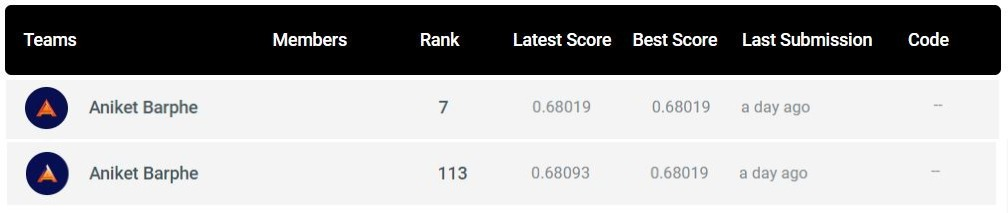

**Competition Link:-** https://machinehack.com/hackathons/analytics_olympiad_2022/overview

**Rank Scored:-**

a) 07 out of 1002 registered participants (Public Leaderboard)

b) 113 out of 1002 registered participants (Private Leaderboard)